# **ARIMA Modeling Plan**



In [18]:
!pip install statsmodels matplotlib pandas

In [19]:
import pandas as pd

df = pd.read_csv("/content/Interpolated_PM10_Levels.csv")  # use your downloaded filename
df.set_index("Year", inplace=True)
print(df)

      PM10_AbuDhabi_Avg  PM10_Dubai_Avg
Year                                   
2011         158.100000      186.250000
2013         138.000000       74.428571
2014         106.100000       86.428571
2015         142.052632       90.142857
2016         123.631579      113.500000
2017         122.157895      120.750000
2018         134.210526      118.000000
2019         108.526316      122.000000
2020         111.485714      105.872000
2021         119.037435      121.228653
2022         143.723581      129.804085


In [20]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Abu Dhabi
model_auh = ARIMA(df["PM10_AbuDhabi_Avg"], order=(1,1,1))  # (p,d,q) – adjust if needed
fit_auh = model_auh.fit()
forecast_auh = fit_auh.forecast(steps=1)  # Forecast 2023

# Dubai
model_dxb = ARIMA(df["PM10_Dubai_Avg"], order=(1,1,1))
fit_dxb = model_dxb.fit()
forecast_dxb = fit_dxb.forecast(steps=1)  # Forecast 2023

print("Abu Dhabi 2023 Forecast:", forecast_auh.values[0])
print("Dubai 2023 Forecast:", forecast_dxb.values[0])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

Abu Dhabi 2023 Forecast: 128.8547713854272
Dubai 2023 Forecast: 113.77293055866821


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


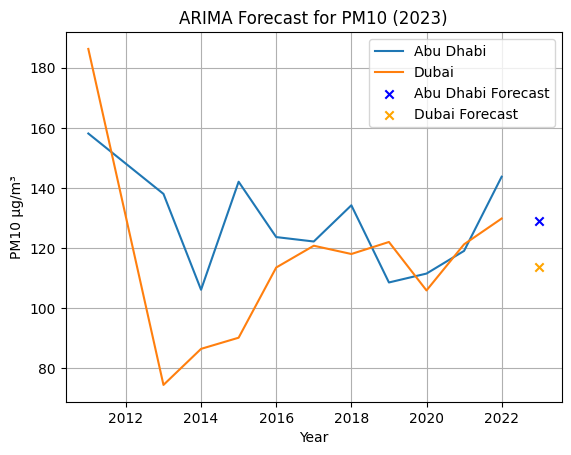

In [21]:
plt.plot(df.index, df["PM10_AbuDhabi_Avg"], label="Abu Dhabi")
plt.plot(df.index, df["PM10_Dubai_Avg"], label="Dubai")
plt.scatter([2023], forecast_auh, label="Abu Dhabi Forecast", marker='x', color='blue')
plt.scatter([2023], forecast_dxb, label="Dubai Forecast", marker='x', color='orange')
plt.title("ARIMA Forecast for PM10 (2023)")
plt.xlabel("Year")
plt.ylabel("PM10 µg/m³")
plt.legend()
plt.grid(True)
plt.show()

# **GPR (Bayesian Forecasting)**

In [22]:
!pip install scikit-learn matplotlib

In [23]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
import numpy as np

# Create X (year) and y (pollutant) for Abu Dhabi
X = df.index.values.reshape(-1, 1)
y = df["PM10_AbuDhabi_Avg"].values

# Define kernel (RBF + noise)
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)

# Fit GPR
gpr = GaussianProcessRegressor(kernel=kernel)
gpr.fit(X, y)

# Predict for historical + 2023
X_forecast = np.append(X, [[2023]], axis=0)
y_mean, y_std = gpr.predict(X_forecast, return_std=True)

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


# **Abu Dhabi**

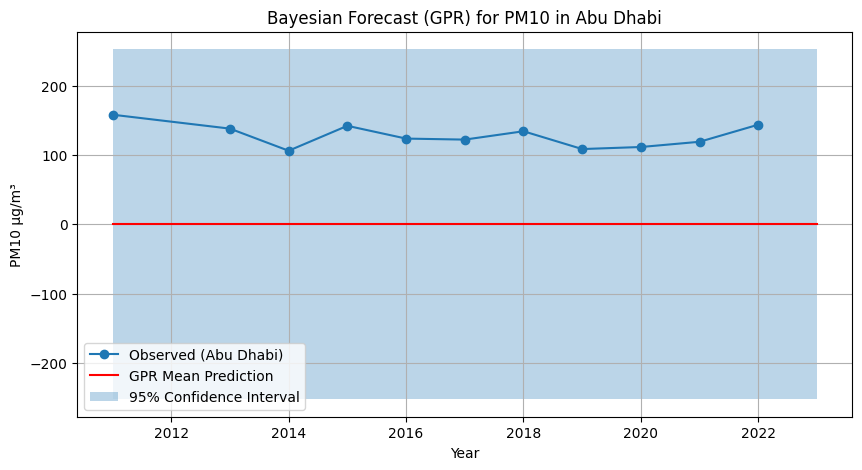

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, 'o-', label="Observed (Abu Dhabi)")
plt.plot(X_forecast, y_mean, 'r-', label="GPR Mean Prediction")
plt.fill_between(X_forecast.ravel(),
                 y_mean - 1.96*y_std,
                 y_mean + 1.96*y_std,
                 alpha=0.3, label="95% Confidence Interval")
plt.title("Bayesian Forecast (GPR) for PM10 in Abu Dhabi")
plt.xlabel("Year")
plt.ylabel("PM10 µg/m³")
plt.legend()
plt.grid(True)
plt.show()

# **Dubai**

In [25]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
import numpy as np

# Create X (year) and y (pollutant) for Abu Dhabi
X = df.index.values.reshape(-1, 1)
y = df["PM10_Dubai_Avg"].values

# Define kernel (RBF + noise)
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)

# Fit GPR
gpr = GaussianProcessRegressor(kernel=kernel)
gpr.fit(X, y)

# Predict for historical + 2023
X_forecast = np.append(X, [[2023]], axis=0)
y_mean, y_std = gpr.predict(X_forecast, return_std=True)

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


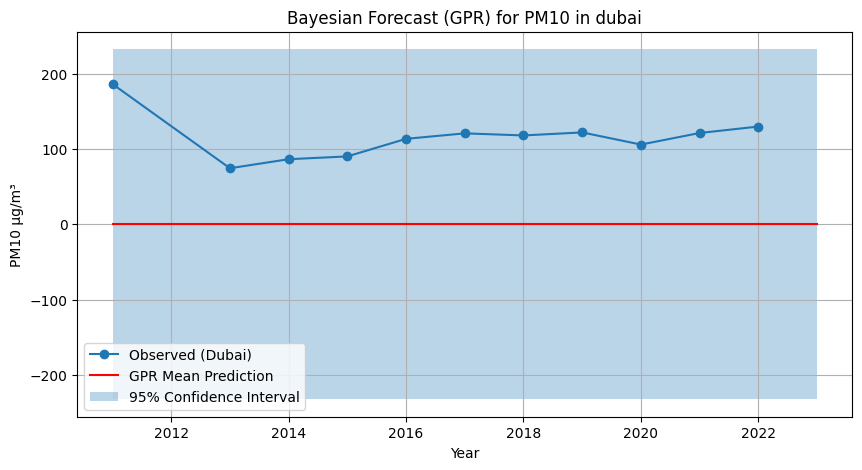

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, 'o-', label="Observed (Dubai)")
plt.plot(X_forecast, y_mean, 'r-', label="GPR Mean Prediction")
plt.fill_between(X_forecast.ravel(),
                 y_mean - 1.96*y_std,
                 y_mean + 1.96*y_std,
                 alpha=0.3, label="95% Confidence Interval")
plt.title("Bayesian Forecast (GPR) for PM10 in dubai")
plt.xlabel("Year")
plt.ylabel("PM10 µg/m³")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

import matplotlib.pyplot as plt

years = list(df.index) + [2023]
plt.plot(df.index, df["PM10_AbuDhabi_Avg"], label="Abu Dhabi Actual", marker='o')
plt.plot(df.index, df["PM10_Dubai_Avg"], label="Dubai Actual", marker='o')
plt.scatter([2023], forecast_auh, label="Abu Dhabi Forecast (2023)", marker='x', color='blue')
plt.scatter([2023], forecast_dxb, label="Dubai Forecast (2023)", marker='x', color='orange')
plt.title("ARIMA Forecast for PM10 (2023)")
plt.xlabel("Year")
plt.ylabel("PM10 µg/m³")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:

from sklearn.metrics import mean_squared_error

rmse_auh_arima = mean_squared_error(df["PM10_AbuDhabi_Avg"], fit_auh.fittedvalues, squared=False)
rmse_dxb_arima = mean_squared_error(df["PM10_Dubai_Avg"], fit_dxb.fittedvalues, squared=False)

print(f"ARIMA RMSE - Abu Dhabi: {rmse_auh_arima:.2f}")
print(f"ARIMA RMSE - Dubai: {rmse_dxb_arima:.2f}")


In [ ]:

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
import numpy as np

# Abu Dhabi GPR
X = df.index.values.reshape(-1, 1)
y_auh = df["PM10_AbuDhabi_Avg"].values
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)
gpr_auh = GaussianProcessRegressor(kernel=kernel)
gpr_auh.fit(X, y_auh)
X_forecast = np.append(X, [[2023]], axis=0)
y_mean_auh, y_std_auh = gpr_auh.predict(X_forecast, return_std=True)

# Dubai GPR
y_dxb = df["PM10_Dubai_Avg"].values
gpr_dxb = GaussianProcessRegressor(kernel=kernel)
gpr_dxb.fit(X, y_dxb)
y_mean_dxb, y_std_dxb = gpr_dxb.predict(X_forecast, return_std=True)


In [ ]:

plt.figure(figsize=(12, 5))

# Abu Dhabi
plt.subplot(1, 2, 1)
plt.plot(X, y_auh, 'o-', label="Actual (AUH)")
plt.plot(X_forecast, y_mean_auh, 'r-', label="GPR Mean")
plt.fill_between(X_forecast.ravel(), y_mean_auh - 1.96*y_std_auh, y_mean_auh + 1.96*y_std_auh, alpha=0.3, label="95% CI")
plt.title("GPR Forecast - Abu Dhabi")
plt.xlabel("Year")
plt.ylabel("PM10")
plt.legend()

# Dubai
plt.subplot(1, 2, 2)
plt.plot(X, y_dxb, 'o-', label="Actual (DXB)")
plt.plot(X_forecast, y_mean_dxb, 'r-', label="GPR Mean")
plt.fill_between(X_forecast.ravel(), y_mean_dxb - 1.96*y_std_dxb, y_mean_dxb + 1.96*y_std_dxb, alpha=0.3, label="95% CI")
plt.title("GPR Forecast - Dubai")
plt.xlabel("Year")
plt.ylabel("PM10")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

print("📊 Forecast Summary:")
print(f"ARIMA Abu Dhabi 2023 Forecast: {forecast_auh.values[0]:.2f} | RMSE: {rmse_auh_arima:.2f}")
print(f"GPR   Abu Dhabi 2023 Forecast: {y_mean_auh[-1]:.2f}")

print(f"ARIMA Dubai 2023 Forecast: {forecast_dxb.values[0]:.2f} | RMSE: {rmse_dxb_arima:.2f}")
print(f"GPR   Dubai 2023 Forecast: {y_mean_dxb[-1]:.2f}")
